In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
headers = ["ID", "branch", "cidade", "tipo_cliente", "genero", "linha_de_produto", "preco_unitario", "quantidade", "taxa_5%", "total", "data", "hora", "forma_pagamento", "custo_produtos", "porcentagem_margem_bruta", "renda_bruta", "avaliacao"]
dataset = pd.read_csv("supermarket_sales - Sheet1.csv", names = headers, header = 0)

# dataset = pd.read_csv("supermarket_sales - Sheet1.csv", sep=',')
dataset.head()

,ID,branch,cidade,tipo_cliente,genero,linha_de_produto,preco_unitario,quantidade,taxa_5%,total,data,hora,forma_pagamento,custo_produtos,porcentagem_margem_bruta,renda_bruta,avaliacao
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## Contagem dos tipos de compradores ('Customer type')

In [10]:
tipos_consumidores = dataset['tipo_cliente'].value_counts()

In [11]:
dataset['tipo_cliente'].value_counts().sum()

1000

In [9]:
tipos_consumidores.plot(kind='pie', autopct='%.1f%%');

AttributeError: 'numpy.int64' object has no attribute 'plot'

<AxesSubplot:xlabel='Customer type', ylabel='count'>

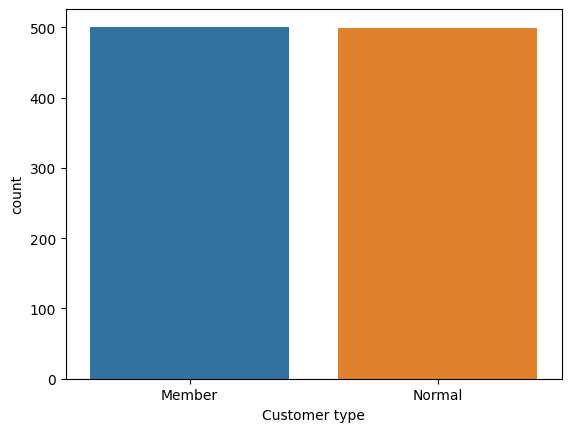

In [13]:
sns.countplot(data=dataset, x='Customer type');

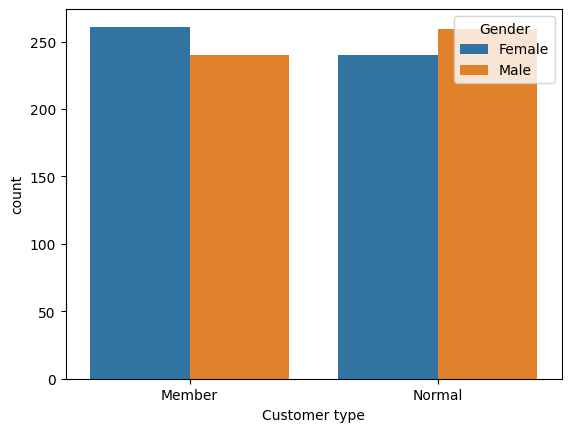

In [21]:
fig = sns.countplot(data=dataset, x='Customer type', hue='Gender')

### Quantidade de produtos vendidos por departamento ('Product line')

In [31]:
dataset.groupby('Product line')['Quantity'].sum()

Product line
Electronic accessories    971
Fashion accessories       902
Food and beverages        952
Health and beauty         854
Home and lifestyle        911
Sports and travel         920
Name: Quantity, dtype: int64

<AxesSubplot:xlabel='Product line', ylabel='Quantity'>

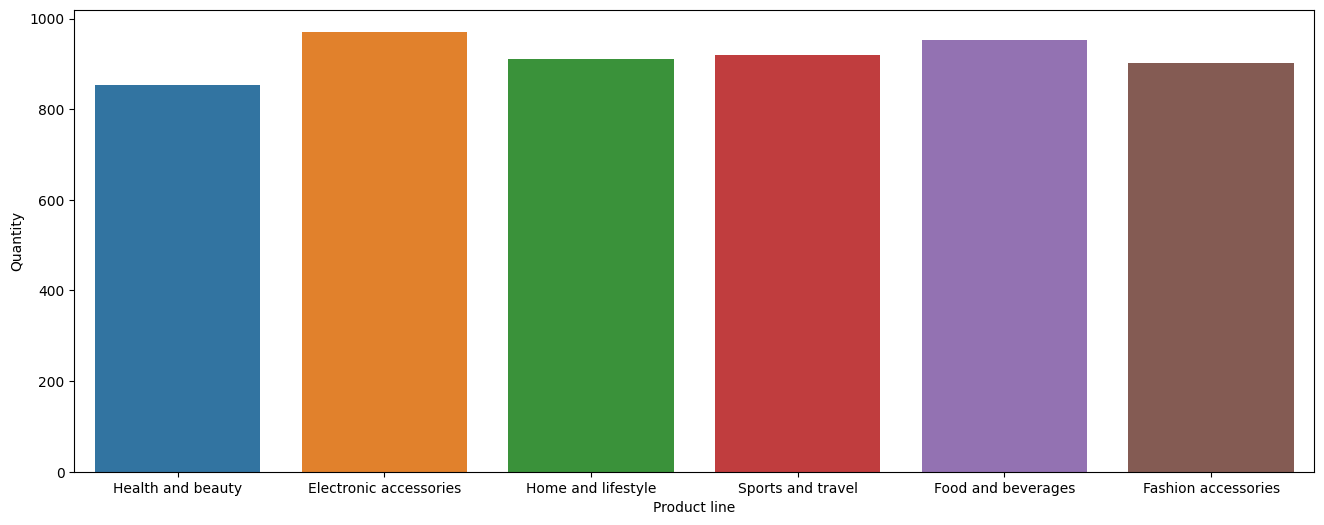

In [49]:
plt.subplots(figsize=(16,6))
sns.barplot(data=dataset, 
            x='Product line', 
            y='Quantity', 
            estimator='sum', 
            errorbar=None,)    

<AxesSubplot:xlabel='Branch', ylabel='Total'>

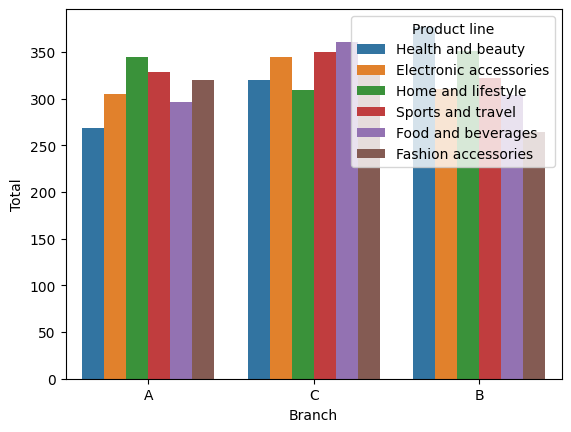

In [54]:
sns.barplot(data=dataset, 
            hue='Product line', 
            y='Total',
            x='Branch',
            errorbar=None)

## Ticket médio por linha de produto e cidade

In [13]:
ticket_medio = dataset.groupby('linha_de_produto')['total'].mean()

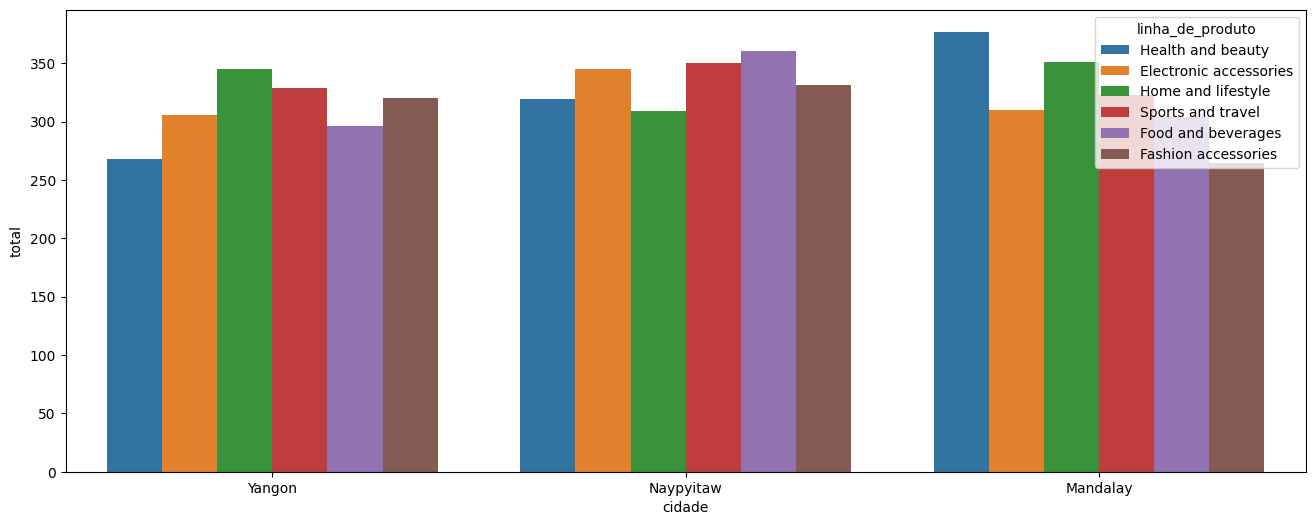

In [23]:
plt.subplots(figsize=(16,6))
sns.barplot(data=dataset, 
            x='cidade', 
            y='total', 
            estimator=np.mean,
            hue='linha_de_produto',
            errorbar=None);

## Representativide de vendas por cidade e linha de produto

In [25]:
ticket_medio = dataset.groupby('linha_de_produto')['total'].sum()